In [12]:
import uproot as up
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [60]:
labels = ['label_QCD', 'label_WZ', 'label_top', 'label_higgs']

In [45]:
label_names = ["QCD", "WZ", "Top", "Higgs"]

In [36]:
path = "/sps/atlas/a/aduque/particle_transformer/PFN/data_train"

In [37]:
file = tb.File(f"{path}/train_10M.h5", mode='r')

In [66]:
label_array_temp = []
for label in labels:
    label_array_temp.append(file.root[label][:])

label_array = np.column_stack((label_array_temp[0], 
                               label_array_temp[1], 
                               label_array_temp[2],
                               label_array_temp[3]
                              ))
del label_array_temp

label_names = np.array(["QCD", "WZ", "Top", "Higgs"])
label_indices = np.argmax(label_array, axis=1)
labels = label_names[label_indices]

weights = file.root['weight'][:]

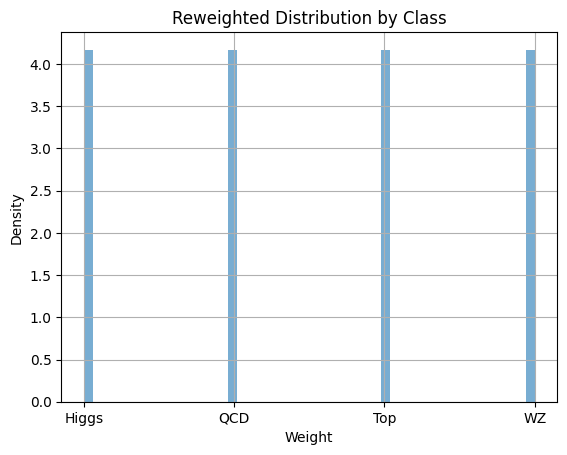

In [73]:

plt.hist(
    labels, 
    bins=50, 
    alpha=0.6, 
    weights=weights,
    density=1
)
plt.xlabel("Weight")
plt.ylabel("Density")
plt.title("Reweighted Distribution by Class")
plt.grid(True)
plt.show()


In [30]:
print(type("hello"))  # Output: <class 'str'>


<class 'str'>


In [75]:
weights[labels == 'Higgs'].sum()

np.float64(2501624.9859445393)

In [76]:
weights[labels == 'WZ'].sum()

np.float64(2500000.0)

In [77]:
weights[labels == 'QCD'].sum()

np.float64(2500000.0)

In [78]:
weights[labels == 'Top'].sum()

np.float64(2500000.0)